In [21]:
import numpy as np
import pandas as pd
import cv2
import tensorflow
import matplotlib.pyplot as plt
import matplotlib
import torch

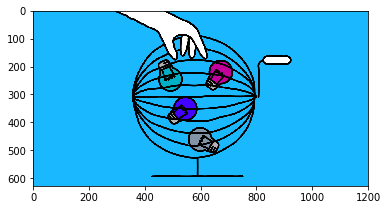

In [22]:
img = cv2.imread("images/image.png")
plt.imshow(img)

# image is different because default setting of 
## colormode in opencv is BGR - Blue Green Red
## colormode for matplotlib is RGB - Red Green Blue

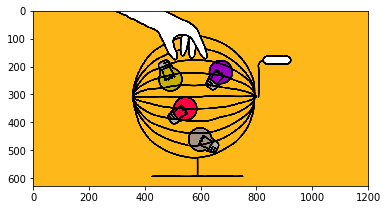

In [23]:
## we need to convert this image colormode to RGB
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

[]

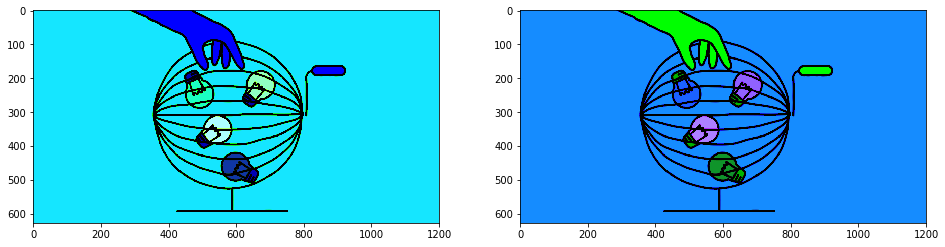

In [24]:
## different color mode
## hsv -> hue  saturation and value
## hls -> hue  lightness and saturation

img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,14))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)
plt.plot()

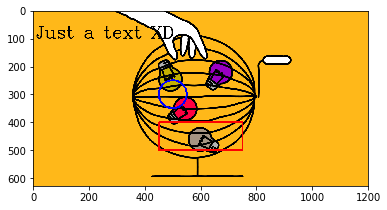

In [40]:
img = cv2.imread("images/image.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgcopy = img.copy()
cv2.rectangle(imgcopy,pt1=(450,400),pt2=(750,500),color=(255,0,0),thickness=5)
cv2.circle(imgcopy,center=(500,300),radius=50,color=(0,0,255),thickness=5)
cv2.putText(imgcopy,text = "Just a text XD",org=(10,100),color=(0,0,0),fontFace=cv2.FONT_HERSHEY_COMPLEX,
           fontScale=2,thickness=2,lineType=cv2.LINE_AA)
plt.imshow(imgcopy)

In [44]:
## function for drawing circle dynamically

def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,center=(x,y),radius=5,color=(0,0,0),thickness=1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img,center=(x,y),radius=10,color=(180,255,24),thickness=1)

In [45]:
img = cv2.imread("images/image.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

cv2.namedWindow('Test_Circle')
cv2.setMouseCallback('Test_Circle',draw_circle)

while True:
    cv2.imshow('Test_Circle',img)
    if cv2.waitKey(10)&0xFF==27:
        break
cv2.destroyAllWindows()

In [49]:
## drawing rectangles
draw = False

ix = -1
iy = -1

def draw_rect(event,x,y,flags,param):
    global draw,ix,iy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        draw = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if (draw == True) :
            cv2.rectangle(img,pt1=(ix,iy),pt2=(x,y),color=(0,0,0),thickness=-1)
        
    elif event == cv2.EVENT_LBUTTONUP:
        draw = False
        cv2.rectangle(img,pt1=(ix,iy),pt2=(x,y),color=(0,0,0),thickness=2)

In [50]:
img = cv2.imread("images/image.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

cv2.namedWindow('Test_Rectangle')
cv2.setMouseCallback('Test_Rectangle',draw_rect)

while True:
    cv2.imshow('Test_Rectangle',img)
    if cv2.waitKey(10)&0xFF==27:
        break
cv2.destroyAllWindows()

In [ ]:
## BLURRING
'''
Blurring is basically used to remove noise from the image.
IMP -> Blurring image too much could cost us in lossing the image data.

Major blurring techniques:
1.Average Blurring
2.Guassian Blurring
3.Median Blurring
4.Bilateral Blurring

'''

[]

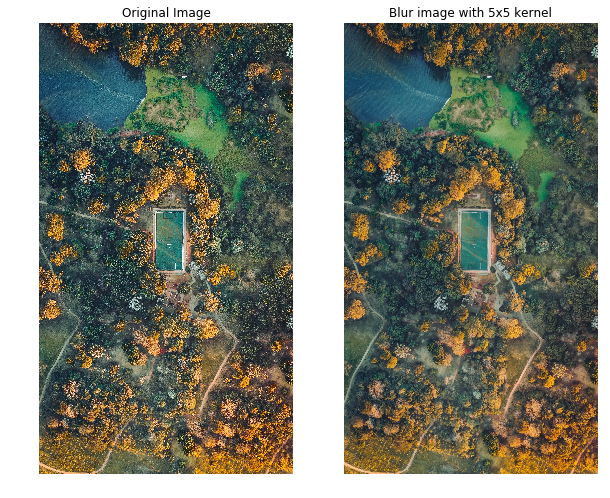

In [72]:
# Average Blurring -> Takes the mean of the kernel and replace the value in center with the mean

img = cv2.imread("images/image2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,10))
ax1,ax2 = fig.subplots(1,2)

## lets take kernel of 5x5
img_blur = cv2.blur(img,ksize=(5,5))
ax1.imshow(img)
ax2.imshow(img_blur)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.set_title("Blur image with 5x5 kernel")
ax2.axis('off')
plt.plot()

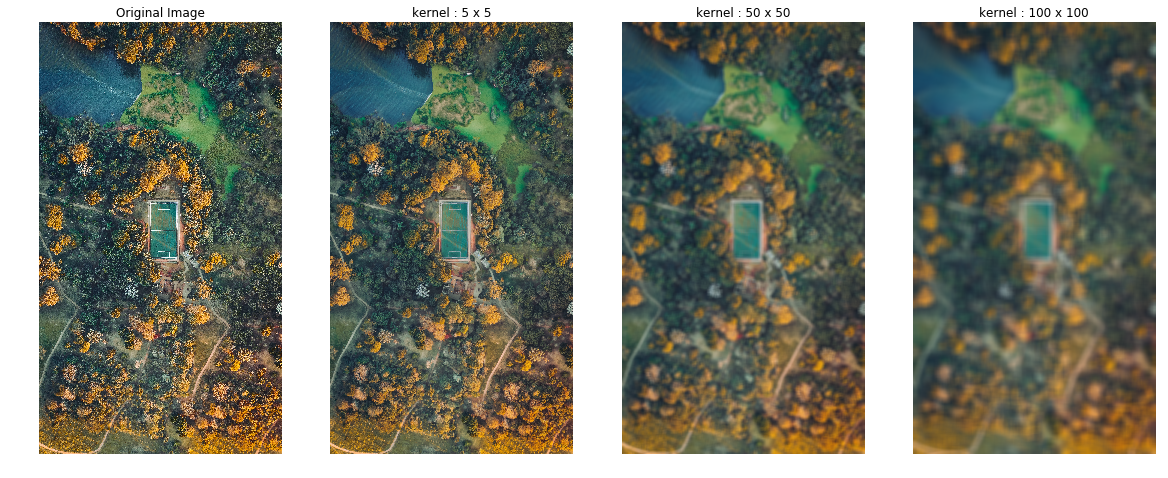

In [82]:
## lets blur image with different kernel sizes

img = cv2.imread("images/image2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernels = [5,50,100]

fig ,ax = plt.subplots(nrows=1,ncols=4,figsize=(20,20))
ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Original Image")

for index,size in enumerate(kernels):
    img_blur = cv2.blur(img,ksize=(size,size))
    axi = ax[index+1]
    axi.imshow(img_blur)
    axi.axis('off')
    axi.set_title("kernel : {} x {}".format(size,size))
plt.show()

[]

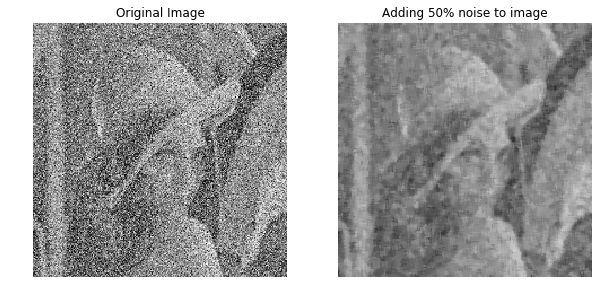

In [96]:
## Median Blurring -> computes the median of all the pixels under the kernel window and 
##                     the central pixel is replaced with this median value

## here ksize should be positive odd integer

img = cv2.imread("images/salt_and_paper_noise.jpg")

fig = plt.figure(figsize=(10,10))
ax1,ax2 = fig.subplots(1,2)

img_med_blur = cv2.medianBlur(img,ksize=5)

ax1.imshow(img)
ax2.imshow(img_med_blur)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.set_title("Adding 50% noise to image")
ax2.axis('off')
plt.plot()


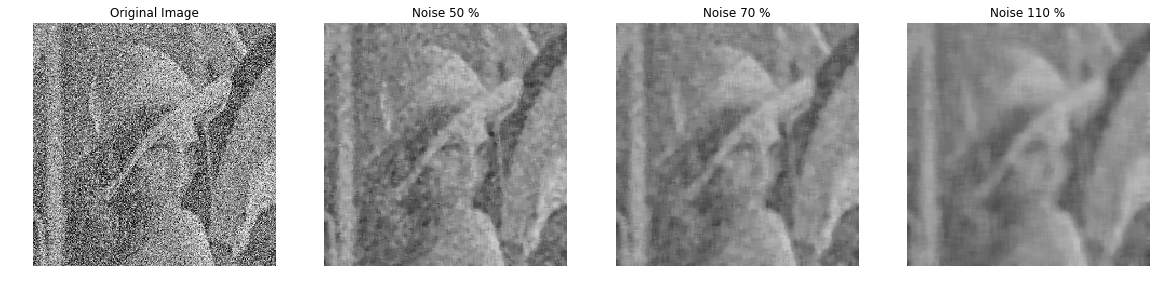

In [99]:
## lets blur image with different kernel sizes

img = cv2.imread("images/salt_and_paper_noise.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernels = [5,7,11]

fig ,ax = plt.subplots(nrows=1,ncols=4,figsize=(20,20))
ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Original Image")

for index,size in enumerate(kernels):
    img_blur = cv2.medianBlur(img,ksize=size)
    axi = ax[index+1]
    axi.imshow(img_blur)
    axi.axis('off')
    axi.set_title("Noise {} %".format(size*10))
plt.show()